In [12]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

### First do this using statsmodels built-in function

In [17]:
print('Testing alt hypothesis: mean does not equal 0')
np.random.seed(0)
N=100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu

print(f'Two-sided z-test: {ztest(x)}')

Testing alt hypothesis: mean does not equal 0
Two-sided z-test: (2.5648404153513686, 0.01032232684881584)


### Now do this manually 

In [14]:
print('Testing alt hypothesis: mean does not equal 0')
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat /np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p=p_right+ p_left
print(f'Z: {round(z,5)}\np-value: {round(p, 5)}')

Testing alt hypothesis: mean does not equal 0
Z: 2.56484
p-value: 0.01032


### Now do a one-sided test

In [26]:
print(f'One-sided test: {ztest(x, alternative="larger")}')

# do this manually
z = mu_hat / (sigma_hat / np.sqrt(N))
p = 1- norm.cdf(z)
print(f'Z: {round(z,5)}\np-value: {round(p, 5)}')

One-sided test: (2.5648404153513686, 0.00516116342440792)
Z: 2.56484
p-value: 0.00516


#### Use a different reference mean to test against  (instead of mu=0)

In [32]:
mu0 = 0.2
# calculate this using function
print(f'Two-sided Z-test when the mean is the same: {ztest(x, value=mu0)} \n-- (not significant)')

# calculate this manually
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
print(f'\nManual calculation is the same:\nZ: {round(z,5)}\np-value: {round(p, 5)}')

Two-sided Z-test when the mean is the same: (0.5904283402851699, 0.5549035151647227) 
-- (not significant)

Manual calculation is the same:
Z: 0.59043
p-value: 0.5549


### Now do a two-sample test (with two random variables)

In [93]:
# first create some synthetic data

N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N0)*sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1= 1
x1 = np.random.randn(N1)*sigma1 + mu1

# auto-calc
print(f'Z-test for two sample:{ztest(x0, x1)}')

# manual calculation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1  / N1)
z = dmu_hat / s_hat # reference value is 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
print(f'\nTwo-sample test, manually calulated:\nz:{round(z,5)}\np:{round(p,5)}')

Z-test for two sample:(-2.775534133670837, 0.005511111397783187)

Two-sample test, manually calulated:
z:2.77553
p:0.00551


## Demonstrate rejection 5% of the time

Code below will show that we reject the null hypothesis 5% of the time (when it's true - false alarm scenario)

In [102]:
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z, p = ztest(x1,x2)
    results[i] = p<0.05
print(results.mean())

0.0487


# Z-test with Titanic data set

Testing whether the fare difference between Titanic survivors is statistically significant

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('titanic_train.csv')
x0 = df[df['Survived']==1]['Fare'].dropna().to_numpy()
x1 = df[df['Survived']==0]['Fare'].dropna().to_numpy()

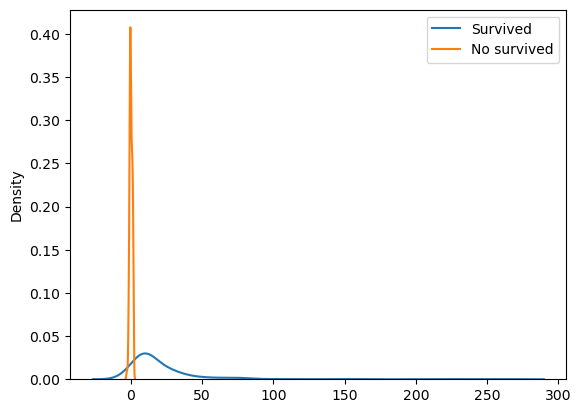

In [114]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='No survived')
plt.legend()

In [117]:
print(f'Mean for each group:\nSurvived:{round(x0.mean(), 5)}\nDid not survive:{round(x1.mean(),5)}')
print(f'\nTwo-sample z-test:{ztest(x0, x1)}')

Mean for each group:
Survived:48.39541
Did not survive:22.11789

Two-sample z-test:(7.939191660871055, 2.035031103573989e-15)
